# Unsupervised Learning, K-means, Clustering, PCA

Given two files (`data_2d.csv` and `mnist.csv`) containing a 2D dataset and the MNIST dataset:

- Apply the K-means algorithm for clustering each of them.  
- To find the optimal number of clusters, use the elbow method.  

Visualize the results of the clustering. For the MNIST dataset, you also need to use the PCA algorithm to reduce the dimensionality of your data to a 2D version.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Loading the first dataset from the file `data_2d.csv`.
df_2d = pd.read_csv('./data/data_2d.csv')
df_2d.head(3)

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400


In [4]:
# Loading the second dataset from the file `mnist.csv`.
df_mnist = pd.read_csv('./data/mnist.csv')
df_mnist.head(3)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's start working with the `df_2d` dataset. As we can see from the output of this dataset, it contains three columns, the first of which carries no useful information since all its rows contain 0. Let's remove this column.

In [5]:
df_2d_cleaned = df_2d.iloc[:, 1:]
df_2d_cleaned.head(3)

,-7.687164597386728637e-01,4.608603078297135447e-01
0,2.687848,2.366961
1,-0.201379,0.470430
2,0.608496,1.225400


In [6]:
# Let's apply the elbow method to find the optimal number of clusters.
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(df_2d_cleaned)
    inertias.append(kmeans.inertia_)

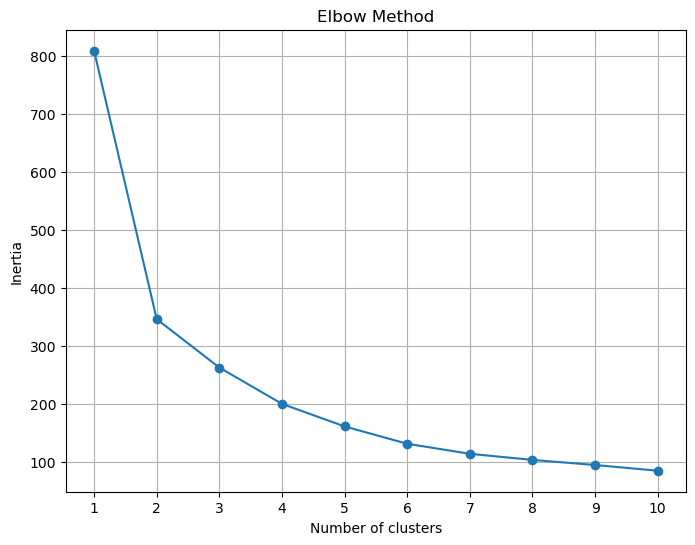

In [7]:
# Visualization of the elbow method.
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In the elbow method graph, it is evident that increasing the number of clusters leads to a decrease in the distance from points to the center of their cluster. It is logical to assume that the number of clusters will range from 2 to 4. Let's conduct further analysis.

In [8]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

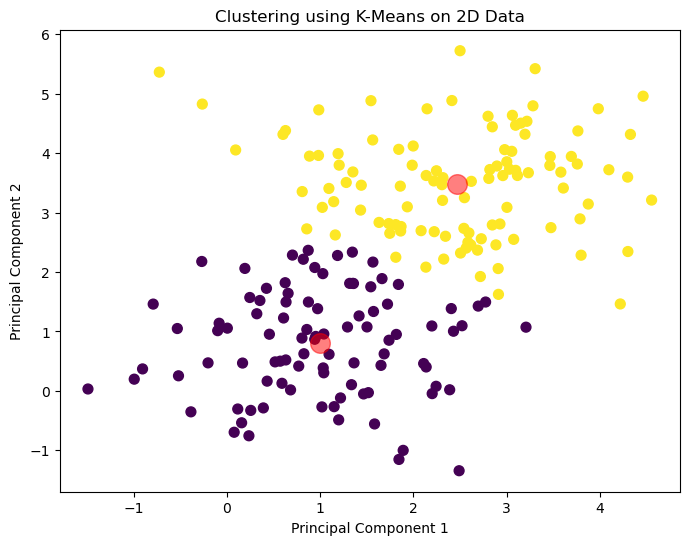

In [9]:
# Visualize the clustered points.
plt.figure(figsize=(8, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Clustering using K-Means on 2D Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

As we can see, 2 clusters are not enough, so let's do the same but with 4 clusters.

In [10]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

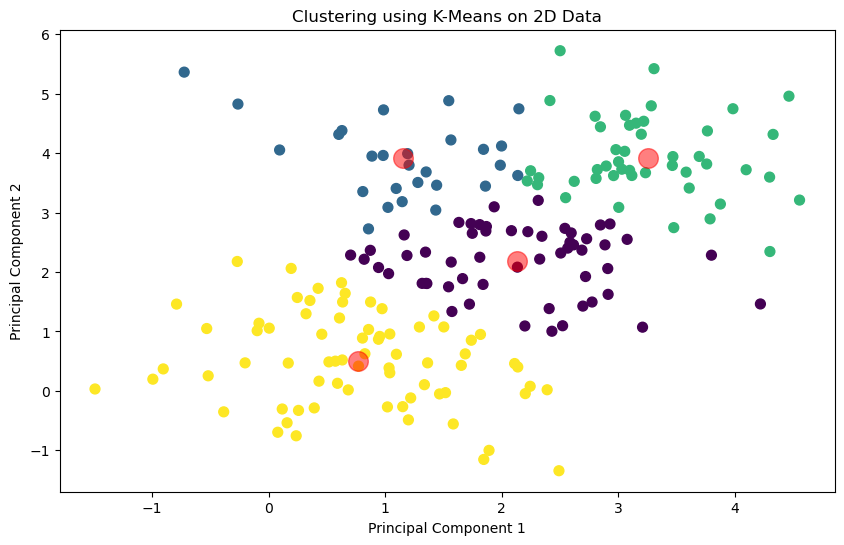

In [11]:
# Visualize the clustered points.
plt.figure(figsize=(10, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Clustering using K-Means on 2D Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

As we can see, the distribution is much better. Therefore, 4 clusters are probably the most optimal option, clearly dividing the data into groups and showing the coordinates of the centroids.

We will also try to implement clustering using the "advanced" and more modern `k-means++` method.

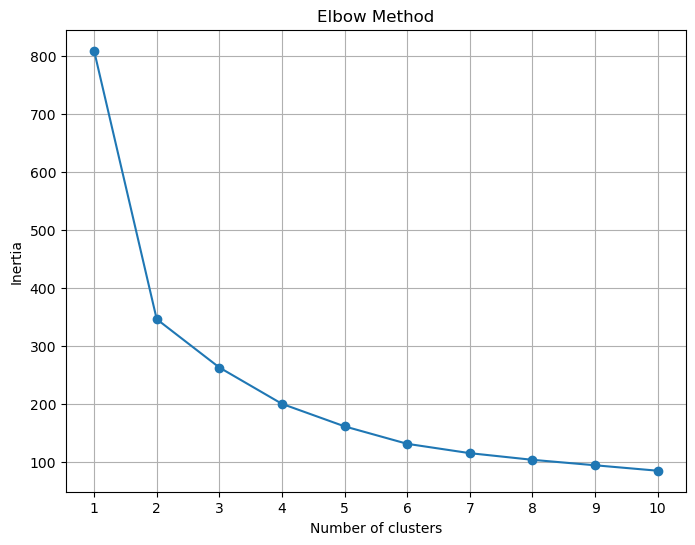

In [12]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_2d_cleaned)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

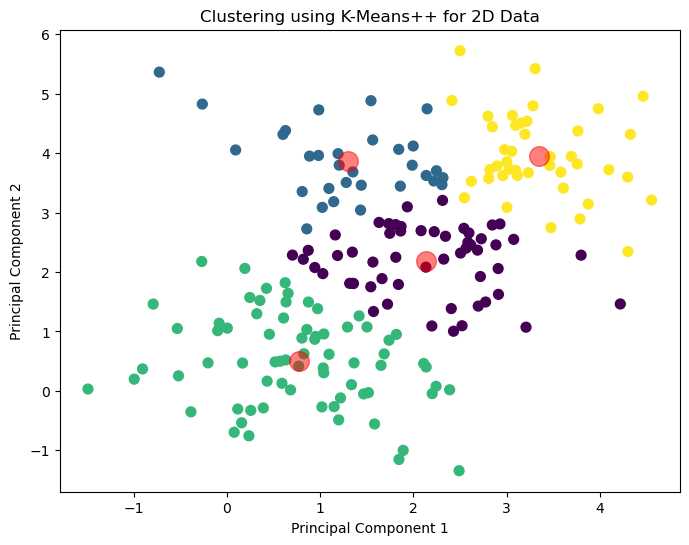

In [13]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_2d_cleaned)

plt.figure(figsize=(8, 6))
plt.scatter(df_2d_cleaned.iloc[:, 0], df_2d_cleaned.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Clustering using K-Means++ for 2D Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

As we can see from the graphs, both methods cluster into groups and yield the expected result. The only difference is that with k-means++, the centroids' coordinates are slightly more centered, which is more accurate, as we can see visually.

In [14]:
# Let's move on to working with the `mnist.csv` dataset. We'll read the first 5 rows of the dataset.
df_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see, we have a very large dataset, and we need to use the PCA algorithm to reduce the dimensionality of our data to a 2D version.

But first, let's split our sample into X (features) and y (class labels).

In [15]:
X = df_mnist.drop(columns=df_mnist.columns[0])
y = df_mnist[df_mnist.columns[0]]

In [16]:
# Let's apply the PCA algorithm to reduce the dimensionality of the data to a 2D version.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Using the k-means method, we will cluster the obtained dataset. To do this, we will first apply the elbow method to determine the optimal number of clusters we need.

In [17]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

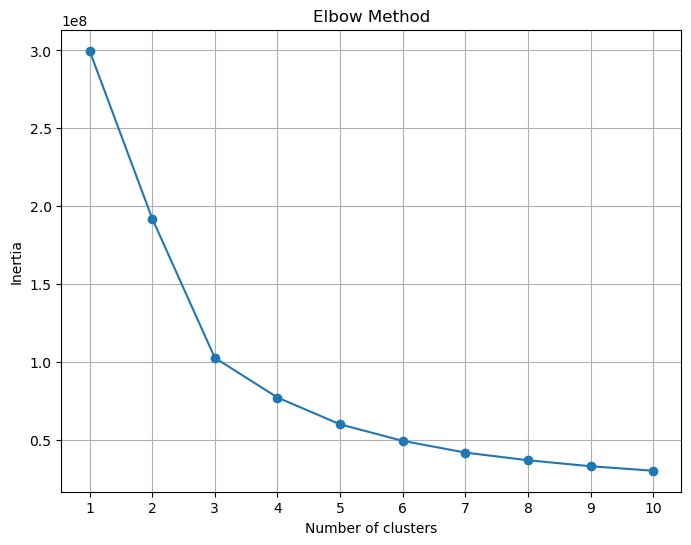

In [18]:
# Visualization of the elbow method.
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

As we can see from this graph, the optimal number of clusters is between 3 and 5. Let's perform a check.

In [19]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

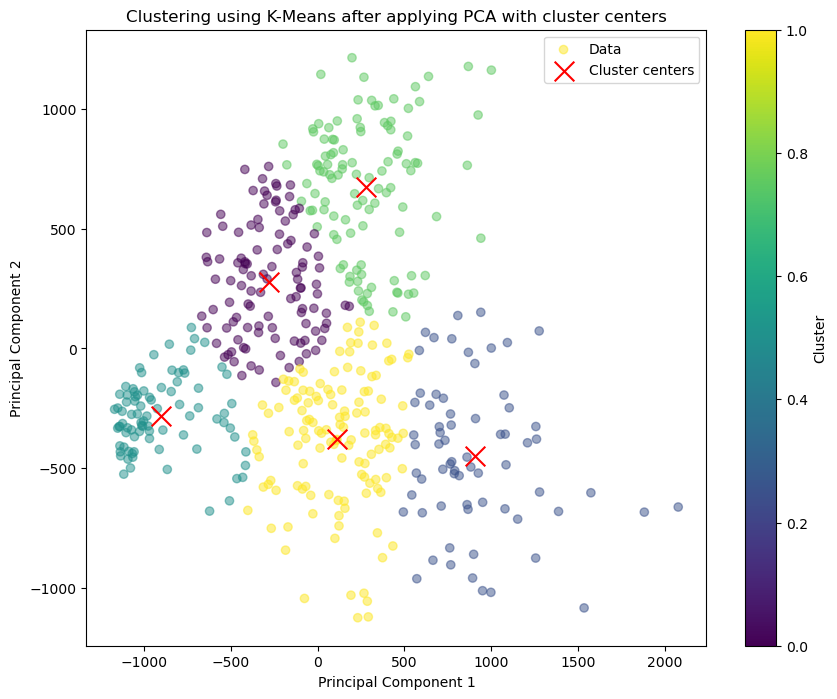

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5, label='Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster centers')
plt.title('Clustering using K-Means after applying PCA with cluster centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

Based on the elbow method graph, it appears that inertia decreases quickly as the number of clusters increases from 1 to 3 or 4, and after that, the decrease becomes less sharp. This may indicate that the optimal number of clusters lies somewhere between 3 and 4, as adding more clusters does not significantly improve the variability of the data that can be captured by the clusters.

When visualizing the results of the k-means method with different datasets, it can be concluded that visually, 5 clusters are the most optimal choice, as they divide the data into the optimal number of clusters with corresponding centroid coordinates.